# RFM (Recency Frequency Monetary) Analysis
RFM is a method used for analyzing customer value.
RFM stands for the three dimensions:

#### Recency – How recently did the customer purchase?
#### Frequency – How often do they purchase?
#### Monetary Value – How much do they spend?

Before starting RFM analysis we need to set objective and outcome of analysis, for this example goal is to define class of customer example - Champions, Potential customers and Need attention.

#### Champions - frequent and more revenue generator.
#### Potential customers - frequent but less revenue generator.
#### Need attention - less frequent and less revenue generator.

In [1]:
# Lets import the Important library.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# load the data
df=pd.read_excel('D:\Internship\Tryquant\sales_data.xlsx')

In [4]:
df.shape

(5001, 40)

In [5]:
df

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22.0,124.0,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1.0,...,2592.18,2409.71,12.0,61.0,37.0,14.0,1067.92,5674.65,3916.53,1327.44
1,29.0,82.0,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1.0,...,2807.66,4106.19,1.0,13.0,24.0,44.0,30.25,3143.69,2205.47,5646.55
2,83.0,43.0,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1.0,...,713.94,2861.90,0.0,6.0,12.0,25.0,0.00,707.98,2560.91,3990.80
3,95.0,44.0,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1.0,...,997.02,1260.08,0.0,10.0,13.0,21.0,0.00,1908.99,2025.05,3058.23
4,124.0,55.0,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1.0,...,2725.66,768.46,6.0,9.0,27.0,13.0,501.34,1197.83,3004.77,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,173987.0,1.0,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207.0,...,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0.00,0.00,117.49
4997,174004.0,1.0,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207.0,...,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0.00,0.00,117.49
4998,174038.0,1.0,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207.0,...,0.00,0.00,0.0,0.0,1.0,0.0,0.00,0.00,117.49,0.00
4999,200783.0,2.0,94.14,47.07,9.94,4.97,2014-06-26,2021-04-01,1235.50,207.0,...,0.00,49.95,0.0,0.0,1.0,1.0,0.00,0.00,44.19,49.95


In [6]:
# looking the value of correlation between the columns.
df.corr()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
CustomerID,1.000000,-0.608092,-0.556489,-0.226023,-0.576043,0.025649,0.279182,0.375343,-0.470777,-0.473127,...,-0.463766,-0.491788,-0.294194,-0.479409,-0.525385,-0.472961,-0.265095,-0.408657,-0.477957,-0.427217
TOTAL_ORDERS,-0.608092,1.000000,0.771996,-0.065208,0.875733,-0.007855,-0.311838,-0.256272,0.741049,0.766660,...,0.644590,0.663521,0.498192,0.804704,0.861575,0.756866,0.380336,0.593952,0.656071,0.565907
REVENUE,-0.556489,0.771996,1.000000,0.366302,0.655447,-0.048932,-0.257746,-0.197782,0.590764,0.624238,...,0.857369,0.841502,0.387685,0.606809,0.664253,0.598595,0.474491,0.769682,0.848650,0.742100
AVERAGE_ORDER_VALUE,-0.226023,-0.065208,0.366302,1.000000,-0.100842,-0.076141,-0.088756,-0.061769,-0.036218,-0.030172,...,0.305416,0.336919,-0.035982,-0.064526,-0.052744,-0.039114,0.156969,0.260563,0.320375,0.291733
CARRIAGE_REVENUE,-0.576043,0.875733,0.655447,-0.100842,1.000000,0.277900,-0.312772,-0.231617,0.651003,0.665464,...,0.552647,0.549227,0.464812,0.712443,0.765135,0.629639,0.346697,0.502783,0.571861,0.455406
AVERAGESHIPPING,0.025649,-0.007855,-0.048932,-0.076141,0.277900,1.000000,-0.084904,0.104563,-0.000875,-0.001364,...,-0.036116,-0.065299,0.028585,0.004779,-0.000934,-0.039176,0.009738,-0.031486,-0.031684,-0.068210
AVGDAYSBETWEENORDERS,0.279182,-0.311838,-0.257746,-0.088756,-0.312772,-0.084904,1.000000,0.054743,-0.216227,-0.222975,...,-0.197848,-0.236006,-0.168915,-0.251694,-0.268035,-0.229511,-0.138387,-0.194264,-0.221773,-0.185189
DAYSSINCELASTORDER,0.375343,-0.256272,-0.197782,-0.061769,-0.231617,0.104563,0.054743,1.000000,-0.199247,-0.199338,...,-0.182017,-0.209898,-0.123382,-0.214157,-0.226500,-0.181582,-0.089109,-0.152151,-0.177786,-0.138213
MONDAY_ORDERS,-0.470777,0.741049,0.590764,-0.036218,0.651003,-0.000875,-0.216227,-0.199247,1.000000,0.999817,...,0.491319,0.503856,0.356378,0.597853,0.638433,0.565423,0.281904,0.441408,0.500867,0.452333
TUESDAY_ORDERS,-0.473127,0.766660,0.624238,-0.030172,0.665464,-0.001364,-0.222975,-0.199338,0.999817,1.000000,...,0.529672,0.524633,0.348824,0.621192,0.662220,0.589753,0.282089,0.488838,0.540816,0.448681


In [7]:
# finding the null value.
df.isnull().sum()

CustomerID                   1
TOTAL_ORDERS                 1
REVENUE                      1
AVERAGE_ORDER_VALUE          1
CARRIAGE_REVENUE             1
AVERAGESHIPPING              1
FIRST_ORDER_DATE             1
LATEST_ORDER_DATE            1
AVGDAYSBETWEENORDERS         1
DAYSSINCELASTORDER           1
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     1
WEEK2_DAY08_DAY15_ORDERS     1
WEEK3_DAY16_DAY23_ORDERS     1
WEEK4_DAY24_DAY31_ORDERS     1
WEEK1_DAY01_DAY07_REVENUE    1
WEEK2_DAY08_DAY15_REVENUE    1
WEEK3_DAY16_DAY23_REVENUE    1
WEEK4_DAY24_DAY31_REVENUE    1
TIME_000

In [8]:
# drop the null value
df = df.iloc[:-1 , :]

In [9]:
## finding the negative values.
for x in df.columns:
    print(x , df[x].min(),"  ",df[x].max())

CustomerID 1.0    277160.0
TOTAL_ORDERS 1.0    156.0
REVENUE 38.5    34847.4
AVERAGE_ORDER_VALUE 10.68    1578.88
CARRIAGE_REVENUE 0.0    529.59
AVERAGESHIPPING 0.0    35.99
FIRST_ORDER_DATE 2014-02-01 00:00:00    2021-10-24 00:00:00
LATEST_ORDER_DATE 2021-04-01 00:00:00    2021-10-24 00:00:00
AVGDAYSBETWEENORDERS 0.0    1409.5
DAYSSINCELASTORDER 1.0    207.0
MONDAY_ORDERS 0    19
TUESDAY_ORDERS 0    23
WEDNESDAY_ORDERS 0    29
THURSDAY_ORDERS 0    32
FRIDAY_ORDERS 0    26
SATURDAY_ORDERS 0    31
SUNDAY_ORDERS 0    23
MONDAY_REVENUE 0.0    12819.41
TUESDAY_REVENUE 0.0    7853.92
WEDNESDAY_REVENUE 0.0    5877.44
THURSDAY_REVENUE 0.0    6434.95
FRIDAY_REVENUE 0.0    6855.22
SATURDAY_REVENUE 0.0    4642.97
SUNDAY_REVENUE 0.0    8366.35
WEEK1_DAY01_DAY07_ORDERS 0.0    32.0
WEEK2_DAY08_DAY15_ORDERS 0.0    42.0
WEEK3_DAY16_DAY23_ORDERS 0.0    37.0
WEEK4_DAY24_DAY31_ORDERS 0.0    53.0
WEEK1_DAY01_DAY07_REVENUE 0.0    8143.65
WEEK2_DAY08_DAY15_REVENUE 0.0    11303.89
WEEK3_DAY16_DAY23_REVENUE 

In [10]:
df.columns

Index(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'],
    

In [11]:
# info about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   float64       
 1   TOTAL_ORDERS               5000 non-null   float64       
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   float64       
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [12]:
# some more info.
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


In [13]:
# Building a new table  consists columns are  Recency, frequency and Monetary.
recency=df[['CustomerID','TOTAL_ORDERS','REVENUE','DAYSSINCELASTORDER']]
recency.columns=['CustomerID','Frequency','Monetary','Recency']

In [14]:
recency.set_index('CustomerID',inplace=True)
recency.head()

,Frequency,Monetary,Recency
CustomerID,,,
22.0,124.0,11986.54,1.0
29.0,82.0,11025.96,1.0
83.0,43.0,7259.69,1.0
95.0,44.0,6992.27,1.0
124.0,55.0,6263.44,1.0


In [15]:
#checking correctness of output..
df[df.CustomerID== 22]

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22.0,124.0,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1.0,...,2592.18,2409.71,12.0,61.0,37.0,14.0,1067.92,5674.65,3916.53,1327.44


In [16]:
rfm=recency.copy()

In [17]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that.

C:\Users\Maddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


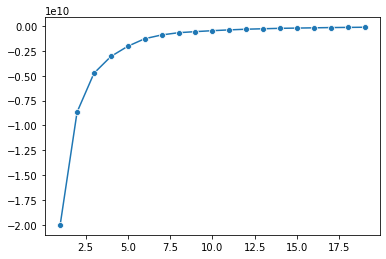

In [18]:
nc=range(1,20)
kmeans=[KMeans(n_clusters=i)for i in nc]
score=[kmeans[i].fit(rfm).score(rfm) for i in range(len(kmeans))]
sn.lineplot(nc,score,marker='o')
plt.show()

In [19]:
score

[-20001311265.70786,
 -8658480605.533712,
 -4752649944.287305,
 -3068022653.7318635,
 -2041755068.1074905,
 -1283969479.0541227,
 -905594585.8854486,
 -678979437.585236,
 -572181233.518941,
 -476372163.6747816,
 -396443318.1808248,
 -328657755.69120467,
 -282731591.65248656,
 -240338033.7030366,
 -215044306.49541926,
 -188732028.22813946,
 -163017195.73709807,
 -147052170.58972833,
 -130929414.15948847]

In [20]:
#fitting data in Kmeans theorem.
kmeans=KMeans(n_clusters=6).fit(rfm)

In [21]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm['Cluster']=kmeans.labels_

In [22]:
rfm

,Frequency,Monetary,Recency,Cluster
CustomerID,,,,
22.0,124.0,11986.54,1.0,3
29.0,82.0,11025.96,1.0,3
83.0,43.0,7259.69,1.0,4
95.0,44.0,6992.27,1.0,4
124.0,55.0,6263.44,1.0,4
...,...,...,...,...
173946.0,1.0,117.49,207.0,0
173987.0,1.0,117.49,207.0,0
174004.0,1.0,117.49,207.0,0


In [23]:
# Number of customer per cluster.
for x in range(0,6):
    y = rfm[rfm.Cluster == x].count()
    print('cluster =',x)
    print('NUmber of Customer = ',y[0])

cluster = 0
NUmber of Customer =  2649
cluster = 1
NUmber of Customer =  859
cluster = 2
NUmber of Customer =  1244
cluster = 3
NUmber of Customer =  32
cluster = 4
NUmber of Customer =  213
cluster = 5
NUmber of Customer =  3


In [24]:
#check our hypothesis
rfm[rfm.Cluster == 1]

,Frequency,Monetary,Recency,Cluster
CustomerID,,,,
258.0,19.0,4967.06,1.0,1
308.0,21.0,4726.38,1.0,1
491.0,37.0,3934.05,1.0,1
492.0,20.0,3933.82,1.0,1
572.0,21.0,3778.07,1.0,1
...,...,...,...,...
1094.0,32.0,2929.21,204.0,1
763.0,13.0,3360.93,205.0,1
975.0,7.0,3048.76,205.0,1


C:\Users\Maddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

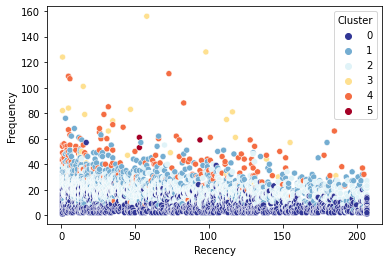

In [61]:
sn.scatterplot(rfm.Recency,rfm.Frequency,hue=rfm.Cluster,palette='RdYlBu_r')

C:\Users\Maddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

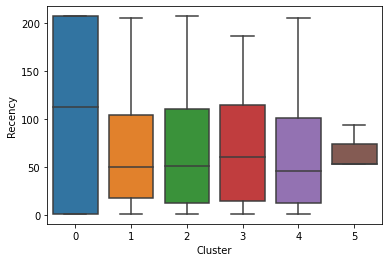

In [25]:
'''
cluster 0 have high recency rate which is bad. cluster 1,2,3,4 and cluster 5 having low as compared to cluster 0 
so they are in race of  Champions, Potential customers.
'''
sn.boxplot(rfm.Cluster,rfm.Recency)

C:\Users\Maddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

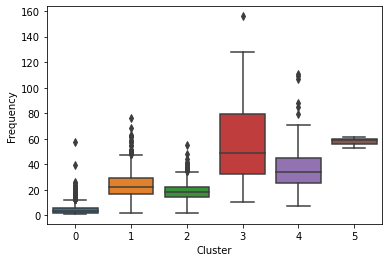

In [40]:
'''
cluster 0 have low frequency rate which is bad. cluster 1,2,3,4 and cluster 5 having high as compared to cluster 0 
so they are in race of  Champions, Potential customers.
'''
sn.boxplot(rfm.Cluster,rfm.Frequency)


C:\Users\Maddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='Monetary'>

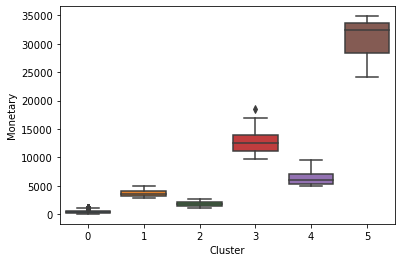

In [27]:
'''
cluster 0 have low Monetary rate which is bad. cluster 5 have highest Montary (money spend) Champions where as 
cluster 1,2,3,4 have medium level(Potential customers) and cluster 0 is Need attention .
'''
sn.boxplot(rfm.Cluster,rfm.Monetary)

# Based on customer Segmentation we found out cluster 5 have highest Monetary (money spend) Champions where as cluster 1,2,3,4 have medium level(Potential customers) and cluster 0 is Need attention .

## Let's perform some advanced analysis for more granularity.

In [28]:
'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25% 
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75% 
values.
'''
quantile=recency.quantile(q=[0.25,0.50,0.75,1.0])

In [29]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.
def FMScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [30]:
rfm['R_Quartile'] = rfm['Recency'].apply(RScore,args=('Recency',quantile))
rfm['F_Quartile'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm['M_Quartile'] = rfm['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [31]:
#calculate RFM score..
rfm['rfm score']=rfm.R_Quartile.map(str)  +rfm.F_Quartile.map(str)  + rfm.M_Quartile.map(str)

In [32]:
'''
Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score 
between 3 and 12. Here the sdvantage is that each of the scores got same importance. However some scores 
will have many sgements as constituents (eg - 413 ad 431)
'''
rfm['Total Score']=rfm['R_Quartile']+rfm['F_Quartile']+rfm['M_Quartile']

In [33]:
rfm

,Frequency,Monetary,Recency,Cluster,R_Quartile,F_Quartile,M_Quartile,rfm score,Total Score
CustomerID,,,,,,,,,
22.0,124.0,11986.54,1.0,3,1,1,1,111,3
29.0,82.0,11025.96,1.0,3,1,1,1,111,3
83.0,43.0,7259.69,1.0,4,1,1,1,111,3
95.0,44.0,6992.27,1.0,4,1,1,1,111,3
124.0,55.0,6263.44,1.0,4,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
173946.0,1.0,117.49,207.0,0,4,4,4,444,12
173987.0,1.0,117.49,207.0,0,4,4,4,444,12
174004.0,1.0,117.49,207.0,0,4,4,4,444,12


In [41]:
rfm.to_csv('rfm.csv')

In [34]:
print("Best Customers: ",len(rfm[rfm['rfm score']=='111']))
print('Loyal Customers: ',len(rfm[rfm['F_Quartile']==1]))
print("Big Spenders: ",len(rfm[rfm['M_Quartile']==1]))
print('Almost Lost: ', len(rfm[rfm['rfm score']=='134']))
print('Lost Customers: ',len(rfm[rfm['rfm score']=='344']))
print('Lost Cheap Customers: ',len(rfm[rfm['rfm score']=='444']))


Best Customers:  120
Loyal Customers:  1142
Big Spenders:  1250
Almost Lost:  49
Lost Customers:  101
Lost Cheap Customers:  609


In [35]:
rfm.sort_values(by=['rfm score','Monetary'])

,Frequency,Monetary,Recency,Cluster,R_Quartile,F_Quartile,M_Quartile,rfm score,Total Score
CustomerID,,,,,,,,,
1673.0,23.0,2501.88,3.0,2,1,1,1,111,3
1651.0,23.0,2513.52,2.0,2,1,1,1,111,3
1627.0,26.0,2525.70,7.0,2,1,1,1,111,3
1621.0,21.0,2530.55,1.0,2,1,1,1,111,3
1610.0,22.0,2534.23,1.0,2,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
72508.0,3.0,312.98,191.0,0,4,4,4,444,12
72496.0,2.0,312.98,207.0,0,4,4,4,444,12
72239.0,3.0,313.98,207.0,0,4,4,4,444,12


In [36]:
rfm.groupby('rfm score')['Monetary'].mean()

rfm score
111    4852.245917
112    1979.567143
121    3672.945814
122    1564.133311
123     765.174464
124     280.290000
131    3313.363333
132    1313.489423
133     557.989288
134     260.869796
142    1146.990000
143     451.082291
144     239.583953
211    4424.992488
212    1933.264598
213     732.300000
221    3695.707341
222    1687.589788
223     796.816410
231    3883.752143
232    1216.838000
233     573.333718
234     262.933636
241    3157.750000
242    1123.500000
243     496.236087
244     184.640392
311    4940.233833
312    1994.448571
313     801.533333
314     242.845000
321    3726.928415
322    1627.994770
323     771.810000
331    3293.600000
332    1327.953810
333     559.153311
334     238.815676
343     433.990625
344     191.053069
411    4326.884103
412    1921.340769
421    3263.441176
422    1613.792239
423     718.857297
431    3687.740000
432    1262.400357
433     547.457177
434     229.558387
442    1333.320000
443     446.288850
444     185.416240
Na

<AxesSubplot:xlabel='Total Score'>

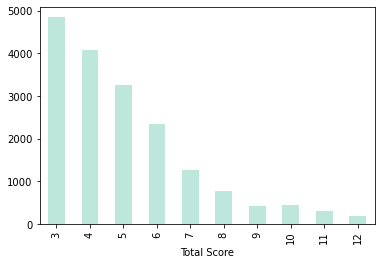

In [37]:
'''
Based on Monetary we see Total_score 3,4,5,6 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122,222 etc.
'''
rfm.groupby('Total Score')['Monetary'].mean().plot(kind='bar',colormap='icefire')

<AxesSubplot:xlabel='Total Score'>

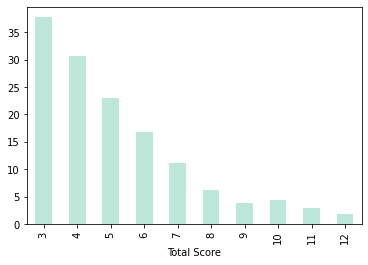

In [38]:
'''
Based on Frequncy we see Total_score 3,4,5,6 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122,222 etc.
'''
rfm.groupby('Total Score')['Frequency'].mean().plot(kind='bar',colormap='icefire')

<AxesSubplot:xlabel='Total Score'>

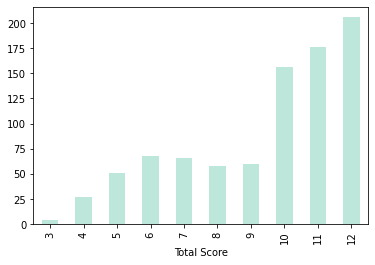

In [39]:
'''
Based on Recency we see Total_score 10,11,12 have highest value which is good for model. because it could have
combination of values such as 444, 434, 334 etc.
'''
rfm.groupby('Total Score')['Recency'].mean().plot(kind='bar',colormap='icefire')